In [23]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report, precision_score, recall_score, f1_score, confusion_matrix
)
import matplotlib.pyplot as plt
import joblib
try:
    from imblearn.over_sampling import SMOTE
    from imblearn.pipeline import Pipeline as ImbPipeline
    IMBLEARN_AVAILABLE = True
except Exception:
    IMBLEARN_AVAILABLE = False

In [2]:
# Load the dataset
data = pd.read_csv('/content/loan_approval_dataset.csv')

In [13]:
#checking duplicates
data.duplicated().sum()

np.int64(0)

In [5]:
# Get descriptive statistics for numerical columns
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [16]:
#first 5 rows of the dataset
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [18]:
#summary about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [48]:
print(" Data Loaded")
print(f"Shape: {data.shape}")
print("Columns:", list(data.columns))
print(data.head(3))

 Data Loaded
Shape: (4269, 13)
Columns: ['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000             

In [47]:
preferred_names = [
    "loan_status", "approved", "is_approved", "status", "target", "label"
]

def pick_target_column(dataframe):
    cols = list(dataframe.columns)

    for name in preferred_names:
        if name in [c.strip().lower() for c in cols]:
            for c in cols:
                if c.strip().lower() == name:
                    if dataframe[c].nunique(dropna=True) == 2:
                        return c

    for c in cols:
        if dataframe[c].nunique(dropna=True) == 2:
            return c
    return None

target_col = pick_target_column(data)
print(f"Target detected: {target_col}")

Target detected:  loan_status


In [46]:
y_raw = data[target_col]

def normalize_binary_target(series):
    s = series.astype(str).str.strip().str.lower()
    mapping = {"approved":1, "y":1, "yes":1, "1":1, "true":1,
               "rejected":0, "n":0, "no":0, "0":0, "false":0}
    mapped = s.map(mapping)
    if mapped.isna().sum() == 0:
        return mapped.astype(int)
    else:
        # fallback: map unique values
        uniq = s.unique()
        return s.map({uniq[0]:0, uniq[1]:1}).astype(int)

y = normalize_binary_target(y_raw)
X = data.drop(columns=[target_col])

print(" Target normalized (0=Rejected, 1=Approved)")
print(y.value_counts())

 Target normalized (0=Rejected, 1=Approved)
 loan_status
1    2656
0    1613
Name: count, dtype: int64


In [45]:
numeric_features = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
categorical_features = [c for c in X.columns if c not in numeric_features]

print("Features")
print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features)
])


Features
Numeric: ['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']
Categorical: [' education', ' self_employed']


In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(" Train/Test Split")
print("Train size:", X_train.shape)
print("Test size :", X_test.shape)

 Train/Test Split
Train size: (3415, 12)
Test size : (854, 12)


In [43]:
log_reg_balanced = Pipeline([
    ("pre", preprocessor),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

tree_balanced = Pipeline([
    ("pre", preprocessor),
    ("clf", DecisionTreeClassifier(class_weight="balanced", random_state=42))
])

print(" Models ready")

 Models ready


In [42]:
if IMBLEARN_AVAILABLE:
    log_reg_smote = ImbPipeline([
        ("pre", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("clf", LogisticRegression(max_iter=1000, random_state=42))
    ])

    tree_smote = ImbPipeline([
        ("pre", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("clf", DecisionTreeClassifier(random_state=42))
    ])
    print("SMOTE Pipelines prepared")
else:
    log_reg_smote, tree_smote = None, None
    print(" imblearn not available, skipping SMOTE")

SMOTE Pipelines prepared


In [33]:
def evaluate_model(name, model, X_tr, y_tr, X_te, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)

    precision = precision_score(y_te, y_pred, zero_division=0)
    recall = recall_score(y_te, y_pred, zero_division=0)
    f1 = f1_score(y_te, y_pred, zero_division=0)

    print(f"\n=== {name} ===")
    print("Precision:", round(precision,4))
    print("Recall   :", round(recall,4))
    print("F1-score :", round(f1,4))
    print("\nReport:\n", classification_report(y_te, y_pred, zero_division=0))

    cm = confusion_matrix(y_te, y_pred)
    plt.imshow(cm, cmap="Blues")
    plt.title(f"Confusion Matrix — {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    for (i,j), val in np.ndenumerate(cm):
        plt.text(j,i,val,ha="center",va="center")
    plt.show()

    return {"model":name,"precision":precision,"recall":recall,"f1":f1}



=== LogReg (balanced) ===
Precision: 0.9588
Recall   : 0.9209
F1-score : 0.9395

Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       323
           1       0.96      0.92      0.94       531

    accuracy                           0.93       854
   macro avg       0.92      0.93      0.92       854
weighted avg       0.93      0.93      0.93       854



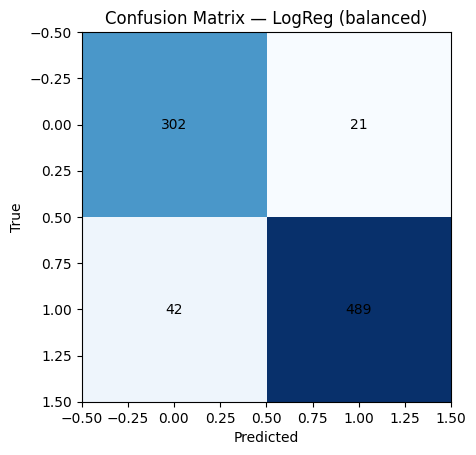


=== DecisionTree (balanced) ===
Precision: 0.9777
Recall   : 0.9906
F1-score : 0.9841

Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       323
           1       0.98      0.99      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



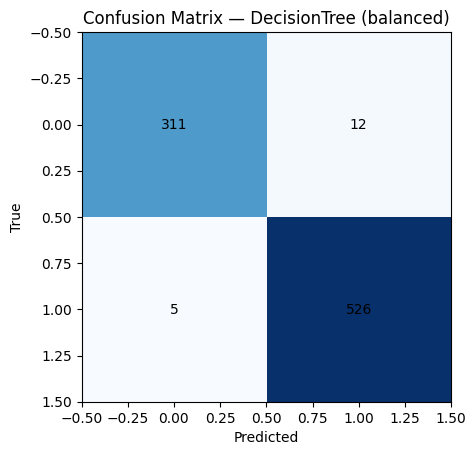


=== LogReg + SMOTE ===
Precision: 0.957
Recall   : 0.9228
F1-score : 0.9396

Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       323
           1       0.96      0.92      0.94       531

    accuracy                           0.93       854
   macro avg       0.92      0.93      0.92       854
weighted avg       0.93      0.93      0.93       854



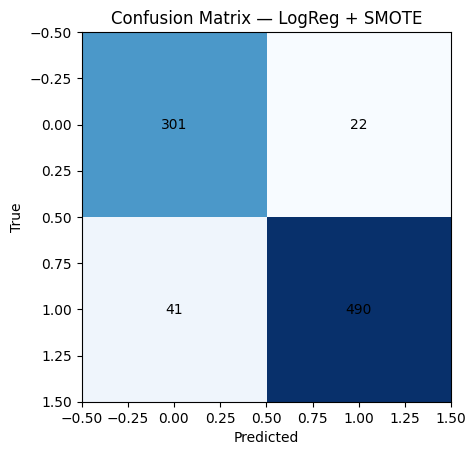


=== DecisionTree + SMOTE ===
Precision: 0.9793
Recall   : 0.9812
F1-score : 0.9802

Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       323
           1       0.98      0.98      0.98       531

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



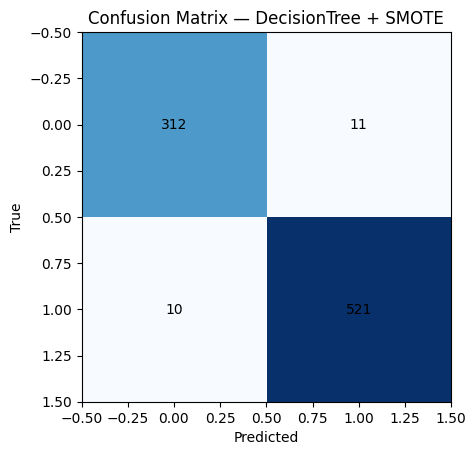

Model Comparison
                     model  precision    recall        f1
1  DecisionTree (balanced)   0.977695  0.990584  0.984097
3     DecisionTree + SMOTE   0.979323  0.981168  0.980245
2           LogReg + SMOTE   0.957031  0.922787  0.939597
0        LogReg (balanced)   0.958824  0.920904  0.939481


In [39]:
results = []
results.append(evaluate_model("LogReg (balanced)", log_reg_balanced, X_train, y_train, X_test, y_test))
results.append(evaluate_model("DecisionTree (balanced)", tree_balanced, X_train, y_train, X_test, y_test))

if log_reg_smote:
    results.append(evaluate_model("LogReg + SMOTE", log_reg_smote, X_train, y_train, X_test, y_test))
    results.append(evaluate_model("DecisionTree + SMOTE", tree_smote, X_train, y_train, X_test, y_test))

results_df = pd.DataFrame(results).sort_values("f1", ascending=False)
print("Model Comparison")
print(results_df)


In [38]:
best_name = results_df.iloc[0]["model"]
name_to_model = {
    "LogReg (balanced)": log_reg_balanced,
    "DecisionTree (balanced)": tree_balanced,
    "LogReg + SMOTE": log_reg_smote,
    "DecisionTree + SMOTE": tree_smote
}
best_model = name_to_model[best_name]
best_model.fit(X, y)

joblib.dump(best_model, "best_loan_model.pkl")
results_df.to_csv("loan_model_evaluation.csv", index=False)

print(" Saved Best Model:", best_name)


 Saved Best Model: DecisionTree (balanced)


In [37]:
def predict_single(sample_dict, model_path="best_loan_model.pkl"):
    model = joblib.load(model_path)
    X_single = pd.DataFrame([sample_dict])
    return int(model.predict(X_single)[0])

print(" Inference Ready")

 Inference Ready
